In [ ]:
pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
#print(spambase.metadata)

# variable information
#print(spambase.variables)


In [ ]:
data =  pd.concat([X, y], axis=1)
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
# Removing special characters from column names, else it creates a problem using various regression models
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [ ]:
# Going through data tables to get a hang of the data
print('Data Table \n')
display(X)
print('\n\nTags Table')
display(y)

Data Table 



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78




Tags Table


,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import re

In [ ]:
# Going through data tables to get a hang of the data
print('Data Table \n')
display(X)
print('\n\nTags Table')
display(y)

Data Table 



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78




Tags Table


,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [ ]:
# Counting number of Spam/Non-Spam samples in the database
data.groupby('Class').count()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
Class,,,,,,,,,,,,,,,,,,,,,
0,2788,2788,2788,2788,2788,2788,2788,2788,2788,2788,...,2788,2788,2788,2788,2788,2788,2788,2788,2788,2788
1,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,...,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813


In [ ]:
# Splitting the data into training and testing subsets
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [ ]:
# Using MultinomialNB Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

predicted = mnb.predict(X_test)

score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

Accuracy Score: 
 80.95582910934105


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A score of ~81% is not very bad.

Since we are working to classify Spam vs Non-Spam emails, it is crucial for us to avoid False-Positive classification, i.e., classifying a Non-Spam email as a Spam email. For this, we check distribution of our classification.


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       822
           1       0.77      0.75      0.76       559

    accuracy                           0.81      1381
   macro avg       0.80      0.80      0.80      1381
weighted avg       0.81      0.81      0.81      1381



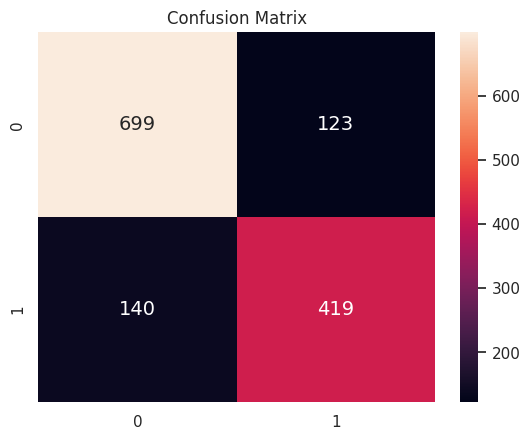

In [ ]:
# Creating a confusion matrix and Classification Report. Output is in order of: True Positive, False Positive, False Negative and True Negative
import seaborn as sn
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

cm1 = cm(y_test, predicted, labels=[0, 1])
df_cm = pd.DataFrame(cm1, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')

print('\nClassification Report: \n', cr(y_test, predicted))

Looks like we have about ~10% of False Positive Classification. This cannot be good.

Let us try better classification tools to pull this down.

In [ ]:
# Using XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=120, leanring_rate=0.075)
xgb.fit(X_train, y_train)
#xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

predicted1 = xgb.predict(X_test)
print(predicted1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:56:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "leanring_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[ 1.0025032   0.02447165 -0.02882503 ...  0.02061807  0.8738236
  0.00406548]


Accuracy Score on XGBoost: 
 94.5691527878349

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       822
           1       0.96      0.91      0.93       559

    accuracy                           0.95      1381
   macro avg       0.95      0.94      0.94      1381
weighted avg       0.95      0.95      0.95      1381



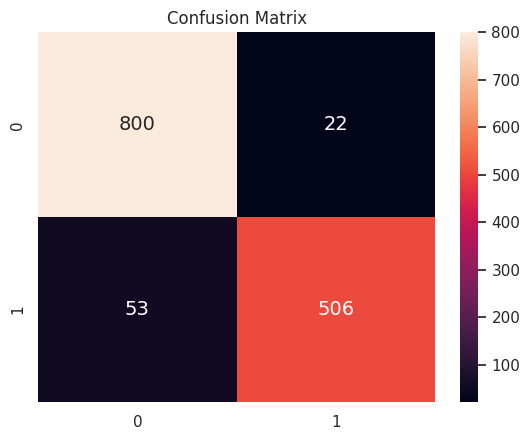

In [ ]:
# Predicting when False Outcomes are Allowed for probabilities >0.5
score1 = accuracy_score(y_test, (predicted1 > 0.5))
print('Accuracy Score on XGBoost: \n', (100*score1))
cm2 = cm(y_test, predicted1 > 0.5, labels=[0, 1])
df_cm = pd.DataFrame(cm2, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
print('\nClassification Report: \n', cr(y_test, (predicted1 > 0.5)))

Using XGBoost Regressor, we have reduced False Positive classification to less than 3%.

Moreover, we have reduced all False classification to less than 6% increased accuracy to ~95%.

Although, it might not be acceptable to have 3% ham emails marked as spam. And to solve for that, we'll now restrict any False Positive outcomes.

Accuracy Score on XGBoost: 
 88.7038377986966

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       822
           1       0.99      0.73      0.84       559

    accuracy                           0.89      1381
   macro avg       0.92      0.86      0.88      1381
weighted avg       0.90      0.89      0.88      1381



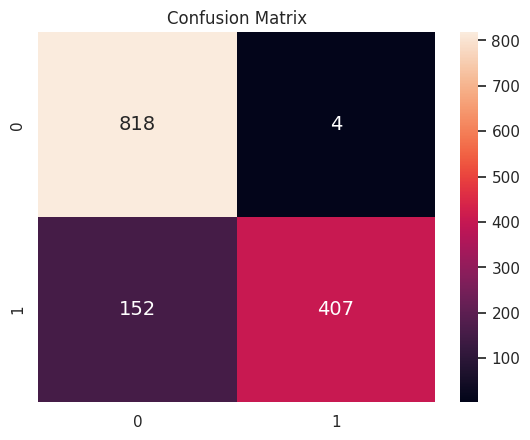

In [ ]:
# Predicting when False Outcomes are Restricted for probabilities <0.9
score1 = accuracy_score(y_test, (predicted1 > 0.9))
print('Accuracy Score on XGBoost: \n', (100*score1))
cm2 = cm(y_test, predicted1 > 0.9, labels=[0, 1])
df_cm = pd.DataFrame(cm2, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
print('\nClassification Report: \n', cr(y_test, (predicted1 > 0.9)))

We have reduced the accuracy of the model to less than 88% but we have managed to avoid hams being classified as spams.